In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

# Loading data

In [8]:
from sklearn.datasets import load_diabetes

In [9]:
# boston_data = load_boston()
boston_data = load_diabetes()

In [10]:
boston_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
boston_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
data = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [13]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
data['MEDV'] = boston_data.target

In [15]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  MEDV    442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [17]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: xlabel='s3'>

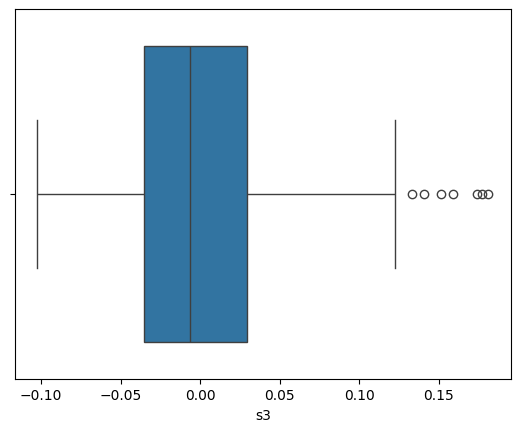

In [26]:
import seaborn as sns
sns.boxplot(x=data['s3'])

In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age       0.075375
sex       0.095322
bmi       0.065477
bp        0.072300
s1        0.062606
s2        0.060203
s3        0.064429
s4        0.073802
s5        0.065678
s6        0.061096
MEDV    124.500000
dtype: float64


In [28]:
data.shape

(442, 11)

In [29]:
boston_df_o1 = data.copy()

In [30]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(411, 11)

In [31]:
data = boston_df_out.copy()

In [32]:
data.isnull().sum()

age     0
sex     0
bmi     0
bp      0
s1      0
s2      0
s3      0
s4      0
s5      0
s6      0
MEDV    0
dtype: int64

In [33]:
x = data.drop(['MEDV'], axis = 1)

In [34]:
y = data['MEDV']

In [35]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [36]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: MEDV, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [39]:
xtrain.shape

(287, 10)

In [40]:
xtest.shape

(124, 10)

# DECISION TREE REGRESSION

In [41]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()

In [42]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [43]:
ypred = dtr.predict(xtest)

In [44]:
ypred

array([ 88., 137., 292., 296., 132., 311., 151., 200.,  75., 275.,  66.,
       109.,  51., 273., 202., 191., 311., 265.,  78., 296., 124., 185.,
       131.,  53., 249., 183.,  53.,  96., 265., 138.,  96., 104.,  67.,
       185., 132., 132., 132., 132.,  75., 121., 321.,  96., 268.,  97.,
       272.,  59., 111., 147., 121., 268., 143., 179.,  97., 297., 292.,
       135.,  65., 185., 183., 281., 232.,  59., 248., 311., 268., 129.,
       272., 273., 168.,  66.,  95.,  53., 179., 151., 212.,  91., 259.,
       118.,  93., 221., 144., 131., 168.,  97.,  78., 311.,  37.,  59.,
       185., 143., 265.,  88., 191., 129., 153., 132., 144., 104., 200.,
       246., 277., 296.,  90., 118., 197., 232., 181., 297., 153., 272.,
        53., 185., 111., 131., 131.,  78., 185., 183.,  96., 259.,  63.,
       121.,  77., 158.])

In [45]:
ytest

106    134.0
379     40.0
185    101.0
321    230.0
209     77.0
       ...  
114    258.0
34      65.0
49     142.0
6      138.0
434     49.0
Name: MEDV, Length: 124, dtype: float64

In [46]:
mean_squared_error(ypred, ytest)

5985.395161290323

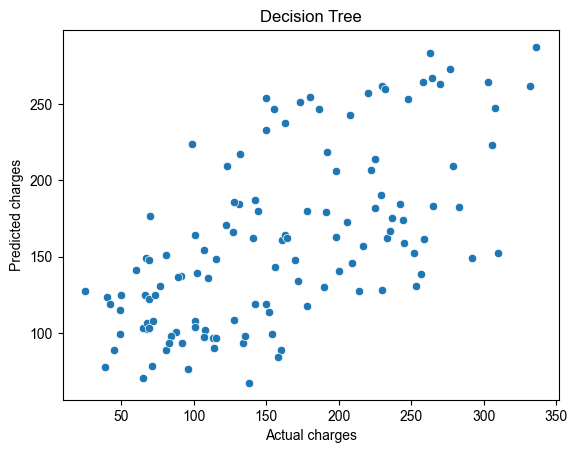

In [66]:
sns.scatterplot(x=ytest , y=ypred )
sns.set_style('whitegrid')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')

plt.title('Decision Tree')

plt.show()

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf_regressor =RandomForestRegressor(1000)
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=1000)

In [49]:
ypred = rf_regressor.predict(xtest)

In [50]:
mean_squared_error(ypred, ytest)

3546.905585403226